# MOwNiT
## Laboratorium
### Całkowanie

In [1]:
#using Pkg
#Pkg.add("QuadGK")
using QuadGK
using Polynomials

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki
(xp, a) = gauss(Float64,7);

In [3]:
xp

7-element Array{Float64,1}:
 -0.9491079123427585
 -0.7415311855993945
 -0.4058451513773972
  0.0
  0.4058451513773972
  0.7415311855993945
  0.9491079123427585

In [4]:
a

7-element Array{Float64,1}:
 0.12948496616886981
 0.2797053914892767
 0.38183005050511887
 0.41795918367346907
 0.38183005050511887
 0.2797053914892767
 0.12948496616886981

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [5]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1 (1p)
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [6]:
using Plots

In [7]:
function Legendre(k)
    if k == 0
        return Polynomial(1)
    elseif k == 1
        return Polynomial([0,1])
    else
        return (2k-1)/k * Polynomial([0,1]) * Legendre(k-1) - (k-1)/(k) * Legendre(k-2)
    end
end

Legendre (generic function with 1 method)

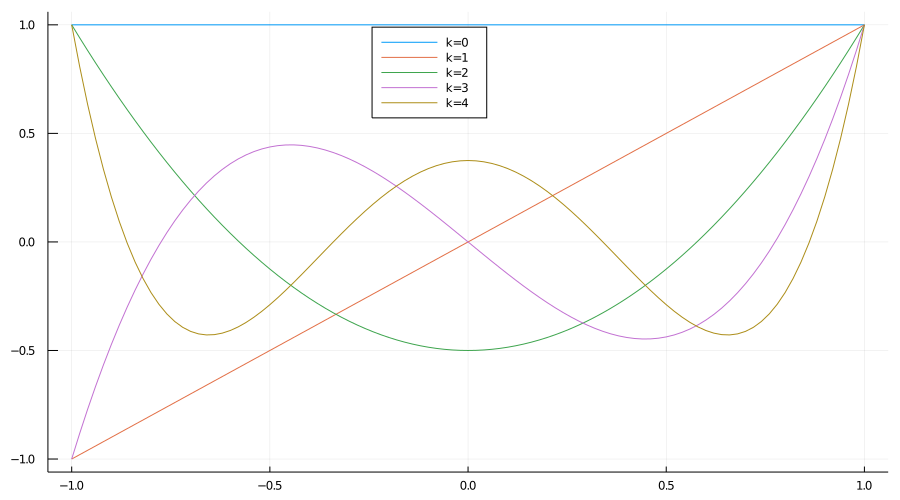

In [8]:
plot(Legendre(0), -1, 1, size = (900, 500), label = "k=0", legend = :top)
plot!(Legendre(1), -1, 1, label = "k=1")
plot!(Legendre(2), -1, 1, label = "k=2")
plot!(Legendre(3), -1, 1, label = "k=3")
plot!(Legendre(4), -1, 1, label = "k=4")

In [9]:
println(roots(Legendre(2)))
println(gauss(Float64,2)[1])

[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]


In [10]:
println(roots(Legendre(3)))
println(gauss(Float64,3)[1])

[-0.7745966692414834, 0.7745966692414835, 0.0]
[-0.7745966692414834, 0.0, 0.7745966692414834]


In [11]:
println(roots(Legendre(4)))
println(gauss(Float64,4)[1])

[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


Odcięte x_i n-punktowej kwadratury Gaussa z funkcją ważącą w(x) w [a, b] są zerami wielomianu ortogonalnego φ_n(x)dla tego samego przedziału i tej samej funkcji ważącej.

### Zadanie 2 (1p)
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [12]:
function CalcGauss(f, k)
    (xp, a) = gauss(Float64,k)
    int = sum(a .* f.(xp)) 
    return int
end

CalcGauss (generic function with 1 method)

In [13]:
print("k = 3\n")

for x in 1:6
    poly = Polynomial(ones(x+1))
    print(x)
    print(".\t diff=")
    println(abs(CalcGauss(poly, 3)- quadgk(poly, -1, 1, rtol=1e-9)[1]))
end


k = 3
1.	 diff=4.440892098500626e-16
2.	 diff=4.440892098500626e-16
3.	 diff=0.0
4.	 diff=0.0
5.	 diff=0.0
6.	 diff=0.045714285714285374


In [14]:
print("k = 7\n")
for x in 1:14
    poly = Polynomial(ones(x+1))
    print(x)
    print(".\t diff=")
    println(abs(CalcGauss(poly, 7)- quadgk(poly, -1, 1, rtol=1e-9)[1]))
end

k = 7
1.	 diff=2.220446049250313e-16
2.	 diff=4.440892098500626e-16
3.	 diff=0.0
4.	 diff=0.0
5.	 diff=8.881784197001252e-16
6.	 diff=4.440892098500626e-16
7.	 diff=8.881784197001252e-16
8.	 diff=8.881784197001252e-16
9.	 diff=1.3322676295501878e-15
10.	 diff=8.881784197001252e-16
11.	 diff=8.881784197001252e-16
12.	 diff=1.7763568394002505e-15
13.	 diff=1.3322676295501878e-15
14.	 diff=0.0001854659197313424


In [15]:
print("k = 10\n")
for x in 1:21
    poly = Polynomial(ones(x+1))
    print(x)
    print(".\t diff=")
    println(abs(CalcGauss(poly, 10)- quadgk(poly, -1, 1, rtol=1e-9)[1]))
end

k = 10
1.	 diff=0.0
2.	 diff=0.0
3.	 diff=4.440892098500626e-16
4.	 diff=4.440892098500626e-16
5.	 diff=0.0
6.	 diff=8.881784197001252e-16
7.	 diff=4.440892098500626e-16
8.	 diff=4.440892098500626e-16
9.	 diff=1.3322676295501878e-15
10.	 diff=8.881784197001252e-16
11.	 diff=8.881784197001252e-16
12.	 diff=1.3322676295501878e-15
13.	 diff=8.881784197001252e-16
14.	 diff=0.0
15.	 diff=8.881784197001252e-16
16.	 diff=8.881784197001252e-16
17.	 diff=8.881784197001252e-16
18.	 diff=8.881784197001252e-16
19.	 diff=0.0
20.	 diff=2.9255903299940655e-6
21.	 diff=2.925590330882244e-6


Kwadratura ma stopień dokładności 2n−1 (dla n-punktowej kwadratury)

t.j. dokładna dla wielomianu: P(x) = Q(x)·φ_n(x) + R(x) 

(Q,R − stopnia < n)

### Zadanie 3 (1p)
  
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [16]:
function CalcGaussAB(f, k, a, b)
    g(x) = f(((b+a)/2) + (b-a)/ 2 * x)
    return CalcGauss(g, k) * (b-a)/2
end

CalcGaussAB (generic function with 1 method)

In [17]:
CalcGaussAB(Polynomial(ones(5)), 100, 0, 10)

22893.333333333336

In [18]:
for x in 1:15
    poly = Polynomial(ones(x+1))
    print(x)
    print(".\t diff=")
    println(abs(CalcGaussAB(poly, 20, -10, 10) - quadgk(poly, -10, 10, rtol=1e-9)[1]))
end

print("\nsin")
print(".\t diff=")
println(abs(CalcGaussAB(sin, 20, -10, 10) - quadgk(sin, -10, 10, rtol=1e-9)[1]))
print("exp")
print(".\t diff=")
println(abs(CalcGaussAB(exp, 20, -10, 10) - quadgk(exp, -10, 10, rtol=1e-9)[1]))

1.	 diff=1.4210854715202004e-14
2.	 diff=4.547473508864641e-13
3.	 diff=2.1600499167107046e-12
4.	 diff=2.9103830456733704e-11
5.	 diff=2.473825588822365e-10
6.	 diff=1.862645149230957e-9
7.	 diff=2.514570951461792e-8
8.	 diff=2.682209014892578e-7
9.	 diff=2.652406692504883e-6
10.	 diff=2.6702880859375e-5
11.	 diff=0.000274658203125
12.	 diff=0.00244140625
13.	 diff=0.029541015625
14.	 diff=0.015625
15.	 diff=0.0

sin.	 diff=6.192962809237201e-16
exp.	 diff=3.637978807091713e-12


### Zadanie 4 (1p)
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

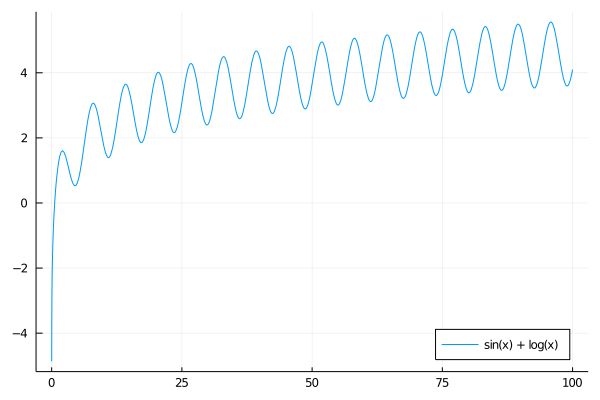

In [19]:
f(x) = sin(x) + log(x)
plot(f, 0, 100, legend = :bottomright, label = "sin(x) + log(x)")

In [20]:
quadgk(f, 0, 100, rtol=1e-9)[1]

360.6546997466996

In [29]:
quadgk(Polynomial(ones(11)), -10, 10, rtol=1e-9)[1]

(1.8406938233564198e10, 7.62939453125e-6)

In [22]:
g(x) = 1/sqrt(2*π)*ℯ^(-x^2/2)
quadgk(g, -Inf, Inf, rtol=1e-9)[1]

1.0000000000000002

### Zadanie 5 (1p)
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie, 
w zaleznosci od ilosci potrzebnych przedziałów dla przykładowych funkcji:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [23]:
function myIntegration(f, k, a, b) 
    h = (b - a)/k
    return sum(map((x) ->f(x)*h, [a+h/2:h:b-h/2;]))
end

myIntegration (generic function with 1 method)

In [24]:
for x in 1:15
    poly = Polynomial(ones(x+1))
    print(x)
    print(".\t diff=")
    println(abs(myIntegration(poly, 100, -10, 10) - quadgk(poly, -10, 10, rtol=1e-9)[1]))
end

1.	 diff=7.105427357601002e-15
2.	 diff=0.06666666666637866
3.	 diff=0.06666666666524179
4.	 diff=13.399066666672297
5.	 diff=13.399066666497674
6.	 diff=2012.9324295232072
7.	 diff=2012.9324295036495
8.	 diff=268548.95998325944
9.	 diff=268548.9599811435
10.	 diff=3.357389469075775e7
11.	 diff=3.35738946905365e7
12.	 diff=4.0284444568222656e9
13.	 diff=4.0284444567976074e9
14.	 diff=4.698467621751719e11
15.	 diff=4.6984676217534375e11


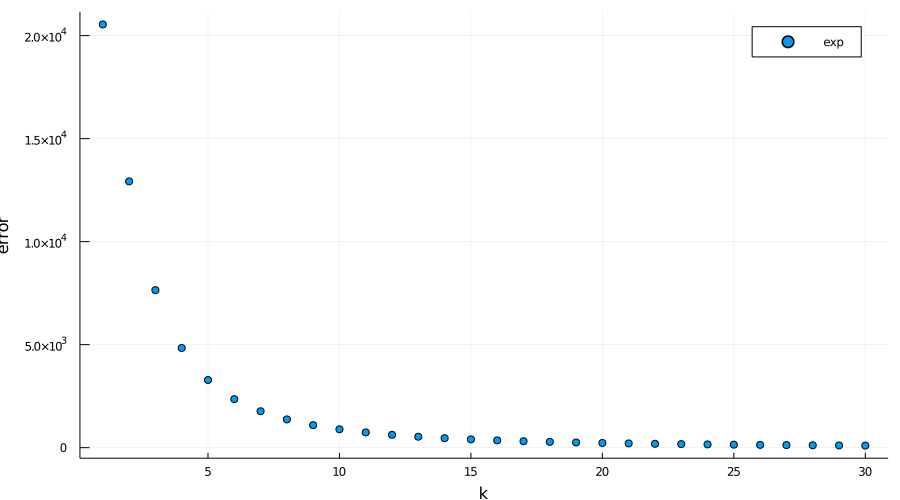

In [25]:
ks = 1:30
expks = [abs(myIntegration(exp, k, 0, 10) - quadgk(exp, 0, 10, rtol=1e-9)[1]) for k in ks]

sinks = [abs(myIntegration(sin, k, 0, 2*pi) - quadgk(sin, 0, 2*pi, rtol=1e-9)[1]) for k in ks]

logks = [abs(myIntegration(log, k, 0, 10) - quadgk(log, 0, 10, rtol=1e-9)[1]) for k in ks]

poly10 = Polynomial(ones(11))
poly10ks = [abs(myIntegration(poly10, k, 0, 10) - quadgk(poly10, 0, 10, rtol=1e-9)[1]) for k in ks]

scatter(ks, expks, label = "exp", size = (900,500), xlabel = "k", ylabel = "error")

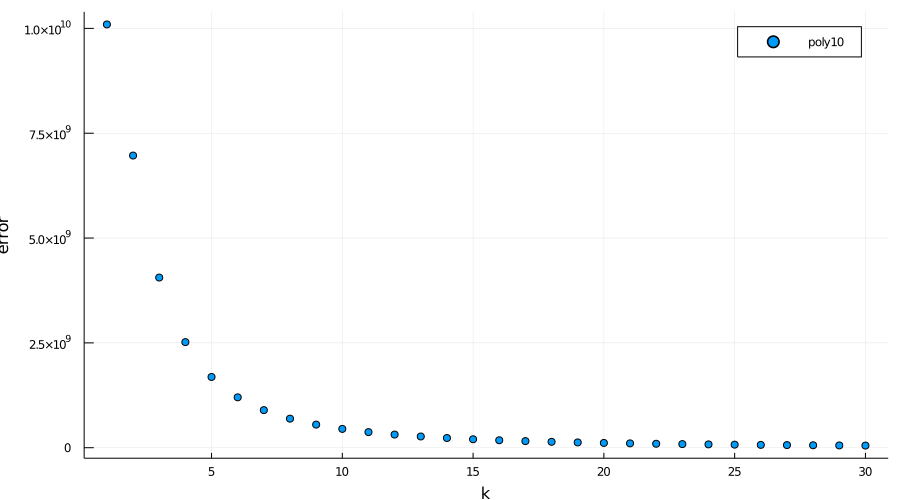

In [26]:
scatter(ks, poly10ks, label = "poly10", size = (900,500), xlabel = "k", ylabel = "error")

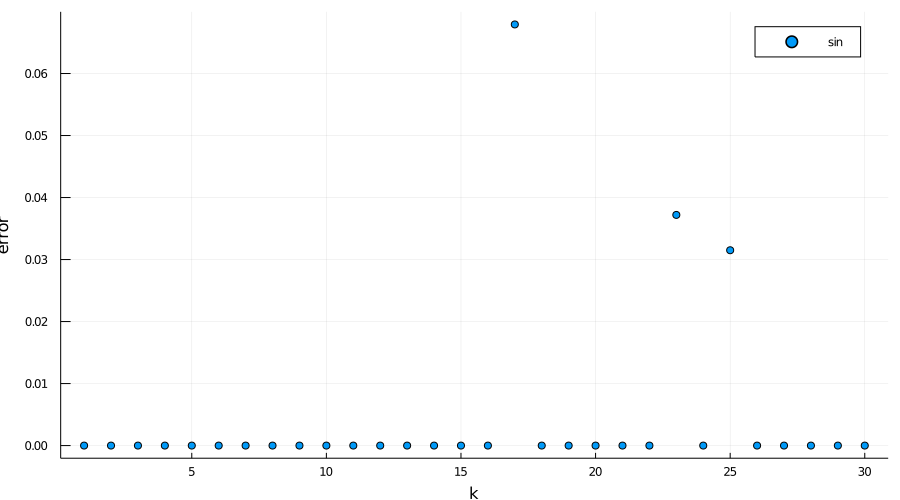

In [27]:
scatter(ks, sinks, label = "sin", size = (900,500), xlabel = "k", ylabel = "error")

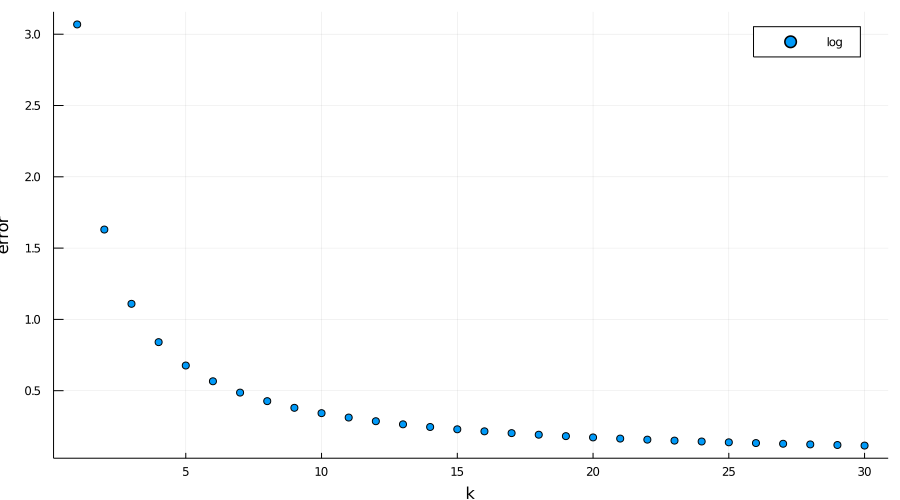

In [28]:
scatter(ks, logks, label = "log", size = (900,500), xlabel = "k", ylabel = "error")